In [1]:
import re
import nltk
import math
import time
import torch
import torchtext
import numpy as np
import pandas as pd
import seaborn as sns
import torch.nn as nn
nltk.download('stopwords')
import matplotlib.pyplot as plt
from torchtext.vocab import GloVe
from nltk.corpus import stopwords
from torchtext import data, datasets
from collections import defaultdict, Counter
from torch.utils.data import DataLoader, TensorDataset

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
with open('drive/MyDrive/DeepLearningUC/Tarea2/Actividad2/SICK.txt') as file:
  mensajes = file.readlines()

In [4]:
print(mensajes[0])

pair_ID	sentence_A	sentence_B	entailment_label	relatedness_score	entailment_AB	entailment_BA	sentence_A_original	sentence_B_original	sentence_A_dataset	sentence_B_dataset	SemEval_set



In [5]:
# 1: Sentence A
# 2: Sentence B
# 4: Relatedness_score
# Last label: Set perteneciente

all_data = []

for i in range(len(mensajes)):
  if i != 0:
    all_data.append(mensajes[i].split('\t'))

In [6]:
mensajes_A_train = []
mensajes_B_train = []
scores_train = []

mensajes_A_val = []
mensajes_B_val = []
scores_val = []

mensajes_A_test = []
mensajes_B_test = []
scores_test = []

In [7]:
for i in range(len(all_data)):

  if all_data[i][11] == 'TRAIN\n':
    mensajes_A_train.append(all_data[i][1].lower())
    mensajes_B_train.append(all_data[i][2].lower())
    scores_train.append(float(all_data[i][4]))

  elif all_data[i][11] == 'TRIAL\n':
    mensajes_A_val.append(all_data[i][1].lower())
    mensajes_B_val.append(all_data[i][2].lower())
    scores_val.append(float(all_data[i][4]))

  elif all_data[i][11] == 'TEST\n':
    mensajes_A_test.append(all_data[i][1].lower())
    mensajes_B_test.append(all_data[i][2].lower())
    scores_test.append(float(all_data[i][4]))

In [8]:
size_train = len(mensajes_A_train)
size_val = len(mensajes_A_val)
size_test = len(mensajes_A_test)

print("Tamaño train: ", size_train)
print("Tamaño val: ", size_val)
print("Tamaño test: ", size_test)

Tamaño train:  4439
Tamaño val:  495
Tamaño test:  4906


In [9]:
proporcion_train = (size_train/(size_train + size_val + size_test))*100
proporcion_val = (size_val/(size_train + size_val + size_test))*100
proporcion_test = (size_test/(size_train + size_val + size_test))*100

print("Proporcion train: ", round(proporcion_train, 2))
print("Proporcion val: ", round(proporcion_val, 2))
print("Proporcion test: ", round(proporcion_test, 2))


Proporcion train:  45.11
Proporcion val:  5.03
Proporcion test:  49.86


In [10]:
# Ahora debemos usar la codificacion Word2Vec
# Pero primero que todo debemos realizar padding

#mensajes_A_train
#mensajes_B_train

#mensajes_A_val
#mensajes_B_val

#mensajes_A_test
#mensajes_B_test

In [11]:
for i in range(len(mensajes_A_train)):
  mensajes_A_train[i] = mensajes_A_train[i].split(' ')

for i in range(len(mensajes_B_train)):
  mensajes_B_train[i] = mensajes_B_train[i].split(' ')

#----------------------------------------------------------

for i in range(len(mensajes_A_val)):
  mensajes_A_val[i] = mensajes_A_val[i].split(' ')

for i in range(len(mensajes_B_val)):
  mensajes_B_val[i] = mensajes_B_val[i].split(' ')

#----------------------------------------------------------

for i in range(len(mensajes_A_test)):
  mensajes_A_test[i] = mensajes_A_test[i].split(' ')

for i in range(len(mensajes_B_test)):
  mensajes_B_test[i] = mensajes_B_test[i].split(' ')

In [12]:
largos = []

#----------------------------------------------------------

for i in range(len(mensajes_A_train)):
  largos.append(len(mensajes_A_train[i]))

for i in range(len(mensajes_B_train)):
  largos.append(len(mensajes_B_train[i]))

#----------------------------------------------------------

for i in range(len(mensajes_A_val)):
  largos.append(len(mensajes_A_val[i]))

for i in range(len(mensajes_B_val)):
  largos.append(len(mensajes_B_val[i]))

#----------------------------------------------------------

for i in range(len(mensajes_A_test)):
  largos.append(len(mensajes_A_test[i]))

for i in range(len(mensajes_B_test)):
  largos.append(len(mensajes_B_test[i]))

#----------------------------------------------------------

In [13]:
maxim_largo = max(largos)

In [14]:
# Realizamos el PADDING

for i in range(len(mensajes_A_train)):
  while len(mensajes_A_train[i]) < maxim_largo:
    mensajes_A_train[i].append('')

for i in range(len(mensajes_B_train)):
  while len(mensajes_B_train[i]) < maxim_largo:
    mensajes_B_train[i].append('')

#----------------------------------------------------------

for i in range(len(mensajes_A_val)):
  while len(mensajes_A_val[i]) < maxim_largo:
    mensajes_A_val[i].append('')

for i in range(len(mensajes_B_val)):
  while len(mensajes_B_val[i]) < maxim_largo:
    mensajes_B_val[i].append('')

#----------------------------------------------------------

for i in range(len(mensajes_A_test)):
  while len(mensajes_A_test[i]) < maxim_largo:
    mensajes_A_test[i].append('')

for i in range(len(mensajes_B_test)):
  while len(mensajes_B_test[i]) < maxim_largo:
    mensajes_B_test[i].append('')

In [15]:
# Extraemos todas las oraciones para usarlas en word2vec

all_sentences = []

#mensajes_A_train
#mensajes_B_train

#mensajes_A_val
#mensajes_B_val

#mensajes_A_test
#mensajes_B_test

for i in mensajes_A_train:
  all_sentences.append(i)

for i in mensajes_B_train:
  all_sentences.append(i)

#---------------------------

for i in mensajes_A_val:
  all_sentences.append(i)

for i in mensajes_B_val:
  all_sentences.append(i)

#---------------------------

for i in mensajes_A_test:
  all_sentences.append(i)

for i in mensajes_B_test:
  all_sentences.append(i)

In [16]:
# Word2Vec

from gensim.models import Word2Vec

In [17]:
model = Word2Vec(sentences=all_sentences, size = 300, window=5, min_count=1, workers=4)

In [18]:
a = model.wv['boy']
b = model.wv['girl']
c = model.wv['ball']
d = model.wv['man']
e = model.wv['woman']

In [19]:
t_1 = np.linalg.norm(a-b) #Boy/Girl
t_2 = np.linalg.norm(d-e) #Man/Woman
t_3 = np.linalg.norm(d-a) #Man/Boy
t_4 = np.linalg.norm(e-b) #Woman/Girl

t_5 = np.linalg.norm(a-c) #Boy/Ball
t_6 = np.linalg.norm(b-c) #Girl/Ball
t_7 = np.linalg.norm(d-c) #Man/Ball
t_8 = np.linalg.norm(e-c) #Woman/Ball

In [20]:
t_1

3.7938747

In [21]:
t_2

4.443006

In [22]:
t_3

6.891575

In [23]:
t_4

8.313189

In [24]:
t_5

9.125274

In [25]:
t_6

10.795775

In [26]:
t_7

11.414353

In [27]:
t_8

13.167866

In [28]:
#mensajes_A_train
#mensajes_B_train

#mensajes_A_val
#mensajes_B_val

#mensajes_A_test
#mensajes_B_test

In [29]:
def calcular_promedio(lista_frase):
  lista_promedio = []
  for i in range(len(lista_frase[0])):
    suma = 0
    for j in range(len(lista_frase)):
      suma = suma + lista_frase[j][i]
    suma = suma/len(lista_frase)
    lista_promedio.append([suma])
  return lista_promedio

In [30]:
input_seq_A_train = []

for i in range(len(mensajes_A_train)):
  lista_frase = []
  for j in range(len(mensajes_A_train[i])):
    word = mensajes_A_train[i][j]
    lista_frase.append(model.wv[word])
  lista_agregar = lista_frase
  input_seq_A_train.append(lista_agregar)

In [31]:
input_seq_B_train = []

for i in range(len(mensajes_B_train)):
  lista_frase = []
  for j in range(len(mensajes_B_train[i])):
    word = mensajes_B_train[i][j]
    lista_frase.append(model.wv[word])
  lista_agregar = lista_frase
  input_seq_B_train.append(lista_agregar)

In [32]:
input_seq_A_val = []

for i in range(len(mensajes_A_val)):
  lista_frase = []
  for j in range(len(mensajes_A_val[i])):
    word = mensajes_A_val[i][j]
    lista_frase.append(model.wv[word])
  lista_agregar = lista_frase
  input_seq_A_val.append(lista_agregar)

In [33]:
input_seq_B_val = []

for i in range(len(mensajes_B_val)):
  lista_frase = []
  for j in range(len(mensajes_B_val[i])):
    word = mensajes_B_val[i][j]
    lista_frase.append(model.wv[word])
  lista_agregar = lista_frase
  input_seq_B_val.append(lista_agregar)

In [34]:
input_seq_A_test = []

for i in range(len(mensajes_A_test)):
  lista_frase = []
  for j in range(len(mensajes_A_test[i])):
    word = mensajes_A_test[i][j]
    lista_frase.append(model.wv[word])
  lista_agregar = lista_frase
  input_seq_A_test.append(lista_agregar)

In [35]:
input_seq_B_test = []

for i in range(len(mensajes_B_test)):
  lista_frase = []
  for j in range(len(mensajes_B_test[i])):
    word = mensajes_B_test[i][j]
    lista_frase.append(model.wv[word])
  lista_agregar = lista_frase
  input_seq_B_test.append(lista_agregar)

In [36]:
input_seq_A_train = torch.tensor(input_seq_A_train)
input_seq_B_train = torch.tensor(input_seq_B_train)

input_seq_A_val = torch.tensor(input_seq_A_val)
input_seq_B_val = torch.tensor(input_seq_B_val)

input_seq_A_test = torch.tensor(input_seq_A_test)
input_seq_B_test = torch.tensor(input_seq_B_test)

In [37]:
# torch.cuda.is_available() checks and returns a Boolean True if a GPU is available, else it'll return False
is_cuda = torch.cuda.is_available()

# If we have a GPU available, we'll set our device to GPU. We'll use this device variable later in our code.
if is_cuda:
    device = torch.device("cuda")
    print("GPU is available")    
else:
    device = torch.device("cpu")
    print("GPU not available, CPU used")

GPU is available


In [38]:
input_seq_A_train = input_seq_A_train.to(device)
input_seq_B_train = input_seq_B_train.to(device)

input_seq_A_val = input_seq_A_val.to(device)
input_seq_B_val = input_seq_B_val.to(device)

input_seq_A_test = input_seq_A_test.to(device)
input_seq_B_test = input_seq_B_test.to(device)

In [39]:
input_seq_train = torch.cat((input_seq_A_train, input_seq_B_train), 0)
input_seq_val = torch.cat((input_seq_A_val, input_seq_B_val), 0)
input_seq_test = torch.cat((input_seq_A_test, input_seq_B_test), 0)

In [40]:
corte = 3 # Cut score
y_train = []

for i in range(len(scores_train)):
  if scores_train[i] >= corte:
    y_train.append(1)
  else:
    y_train.append(0)

In [41]:
y_train = torch.tensor(y_train)

In [42]:
y_train = y_train.to(device)

In [43]:
corte = 3 # Cut score
y_val = []

for i in range(len(scores_val)):
  if scores_val[i] >= corte:
    y_val.append(1)
  else:
    y_val.append(0)

In [44]:
corte = 3 # Cut score
y_test = []

for i in range(len(scores_test)):
  if scores_test[i] >= corte:
    y_test.append(1)
  else:
    y_test.append(0)

In [45]:
def pair_rkg_loss(out_1, out_2, y, m):
  total_loss = 0
  total_loss = torch.tensor(total_loss)
  total_loss.to(device)

  for i in range(len(out_1)):
    o_1 = out_1[i]
    o_2 = out_2[i]

    dist = torch.norm(o_1 - o_2)

    loss_1 = y[i]*dist
    loss_2 = (1-y[i])*max(0, (m-dist))

    loss = loss_1 + loss_2

    total_loss = total_loss + loss
  
  total_loss = total_loss/len(out_1)

  return total_loss.to(device)

In [46]:
# Ahora partimos creando la red

In [47]:
class SIAMESE_model(nn.Module):
    def __init__(self, input_size, hidden_dim, n_layers, device):
        super(SIAMESE_model, self).__init__()

        self.hidden_dim = hidden_dim
        self.n_layers = n_layers

        self.lstm = nn.LSTM(input_size, hidden_dim, n_layers, batch_first=True)

        self.device = device
    
    def forward(self, x):
        
        batch_size = int(x.size(0)/2)

        h_1 = self.init_hidden(batch_size)
        c_1 = self.init_hidden(batch_size)

        h_2 = self.init_hidden(batch_size)
        c_2 = self.init_hidden(batch_size)

        input_A = x[0:int(len(x)/2)]
        input_B = x[int(len(x)/2): len(x)]

        input_A.to(self.device)
        input_B.to(self.device)

        out_1, (h_1, c_1) = self.lstm(input_A, (h_1, c_1))

        out_2, (h_2, c_2) = self.lstm(input_B, (h_2, c_2))
        
        return out_1.to(self.device), out_2.to(self.device), (h_1.to(self.device), c_1.to(self.device)), (h_2.to(self.device), c_2.to(self.device))
    
    def init_hidden(self, batch_size):
        hidden = torch.zeros(self.n_layers, batch_size, self.hidden_dim)
        return hidden.to(self.device)

In [48]:
model = SIAMESE_model(300, 10, 1, device)
model.to(device)

n_epochs = 100
lr = 0.01*5
m = 10

optimizer = torch.optim.Adam(model.parameters(), lr=lr)

In [49]:
# Entrenamiento

epocas_totales = []
loss_train_totales = []
loss_val_totales = []
loss_test_totales = []

for epoch in range(1, n_epochs + 1):

  start = time.time()

  model.train()

  optimizer.zero_grad() # Clears existing gradients from previous epoch

  out_1, out_2, _, _ = model(input_seq_train)

  loss_train = pair_rkg_loss(out_1, out_2, y_train, m)

  loss_train.backward() # Does backpropagation and calculates gradients
  optimizer.step() # Updates the weights accordingly

  model.eval()

  out_1_val, out_2_val, _, _ = model(input_seq_val)
  loss_val = pair_rkg_loss(out_1_val, out_2_val, y_val, m)

  loss_val_totales.append(loss_val)

  out_1_test, out_2_test, _, _ = model(input_seq_test)
  loss_test = pair_rkg_loss(out_1_test, out_2_test, y_test, m)

  loss_test_totales.append(loss_test)



  epocas_totales.append(epoch)

  loss_train_totales.append(loss_train.item())

  end = time.time()

  print('Epoch: {}/{}.............'.format(epoch, n_epochs), end=' ')
  print("Loss Train Epoch: {:.4f}.............".format(loss_train.item()), end =' ')
  print("Time Epoch: {}".format(end-start))  

Epoch: 1/100............. Loss Train Epoch: 3.3075............. Time Epoch: 2.581993818283081
Epoch: 2/100............. Loss Train Epoch: 2.6837............. Time Epoch: 2.5784761905670166
Epoch: 3/100............. Loss Train Epoch: 2.5038............. Time Epoch: 2.5633139610290527
Epoch: 4/100............. Loss Train Epoch: 2.4523............. Time Epoch: 2.539755344390869
Epoch: 5/100............. Loss Train Epoch: 2.4329............. Time Epoch: 2.5786709785461426
Epoch: 6/100............. Loss Train Epoch: 2.4238............. Time Epoch: 2.5452911853790283
Epoch: 7/100............. Loss Train Epoch: 2.4185............. Time Epoch: 2.5849688053131104
Epoch: 8/100............. Loss Train Epoch: 2.4149............. Time Epoch: 2.5437350273132324
Epoch: 9/100............. Loss Train Epoch: 2.4124............. Time Epoch: 2.5553956031799316
Epoch: 10/100............. Loss Train Epoch: 2.4106............. Time Epoch: 2.588533401489258
Epoch: 11/100............. Loss Train Epoch: 2.4093.

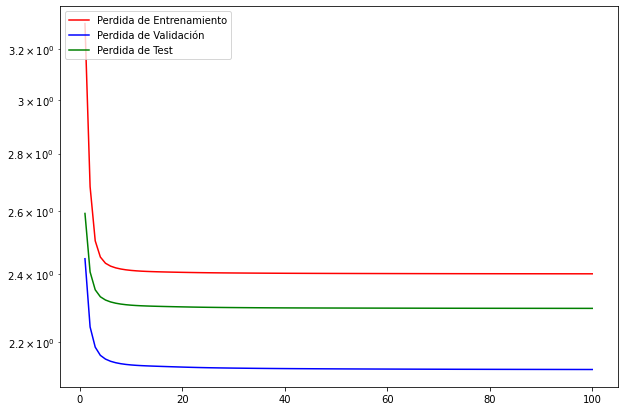

In [52]:
plt.figure(figsize=(10,7))

plt.plot(epocas_totales, loss_train_totales, color = "red")
plt.plot(epocas_totales, loss_val_totales, color = "blue")
plt.plot(epocas_totales, loss_test_totales, color = "green")
plt.legend(['Perdida de Entrenamiento', 'Perdida de Validación', 'Perdida de Test'], loc='upper left')

#plt.yscale('log')

plt.show()

# loss_final = 2.4 if lr_optimo = 0.01*5 